## Import libraries and intitialize all parameters

In [1]:
from mundilib import MundiCatalogue
from utils import height2width
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from map_utils import classification_mask, create_path_map

# Init wms
c = MundiCatalogue()
wms = c.get_collection("Sentinel2").mundi_wms('L2A')

(1, 1)
(2, 2)
(3, 3)
(4, 4)
(4, 5)


Define scl class legend. This will be used later to display the legend and interpret the terrain data.

In [2]:
legend_data = [[0, [0, 0, 0], 'No Data'],
              [1, [1, 0, 0.016], 'Saturated / Defective'],
              [2, [0.525, 0.525, 0.525], 'Dark Area'],
              [3, [0.467, 0.298, 0.043], 'Cloud shadows'],
              [4, [0.063, 0.827, 0.176], 'Vegetation'],
              [5, [1, 1, 0.325], 'Bare soil'],
              [6, [0, 0, 1], 'Water'],
              [7, [0.506, 0.506, 0.506], 'Clouds low probability / Unclassified'],
              [8, [0.753, 0.753, 0.753], 'Clouds medium probability'],
              [9, [0.949, 0.949, 0.949], 'Clouds high probability'],
              [10, [0.733, 0.773, 0.925], 'Cirrus'],
              [11, [0.325, 1, 0.980], 'Snow / Ice']]

legend_dict = dict()
for values in legend_data:
    legend_dict[values[0]] = values[2]


In [3]:
bbox = (1.0, 43.0, 1.3, 43.3)

Define WMS parameters. We define here the bounding box, dates and images size that will be used for this first use case.

In [4]:
_projection_ = 'EPSG:4326'
_bbox_       = bbox
_time_       = '2023-02-06/2023-02-10'
_height_     = 512
_width_      = height2width(_bbox_, _height_)

### Display SLC mask with its legend

In [5]:
# scl_array = np.asarray(Image.open(img_scl))

handles = [
    Rectangle((0,0),1,1, color = c) for k,c,n in legend_data
]
labels = [n for k,c,n in legend_data]

# plt.imshow(scl_array)
# plt.legend(handles,labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Now lets try to simulate a route 

We will use the layer SCL_GRAYSCALE to get the raw scl value.
Then define a route and display it by replacing the pixel values to red.

start  (85, 85)
end  (119, 136)
[(85, 85), (86, 85), (87, 85), (88, 85), (89, 86), (90, 87), (91, 87), (92, 87), (93, 86), (94, 87), (95, 88), (96, 89), (97, 90), (98, 91), (99, 92), (100, 93), (101, 94), (102, 95), (103, 96), (104, 97), (105, 98), (106, 98), (107, 97), (108, 96), (109, 95), (110, 95), (111, 95), (112, 94), (113, 95), (114, 96), (115, 97), (116, 98), (117, 99), (118, 100), (119, 101), (119, 102), (119, 103), (119, 104), (119, 105), (120, 106), (119, 107), (119, 108), (118, 109), (117, 110), (116, 111), (115, 112), (114, 113), (113, 114), (112, 114), (111, 114), (110, 114), (109, 115), (108, 115), (107, 116), (106, 117), (105, 118), (104, 119), (104, 120), (103, 121), (102, 122), (102, 123), (103, 124), (104, 124), (105, 125), (106, 126), (107, 127), (108, 128), (109, 129), (110, 130), (111, 131), (112, 132), (113, 133), (114, 134), (115, 134), (116, 134), (117, 134), (118, 134), (119, 134), (120, 135), (119, 136)]


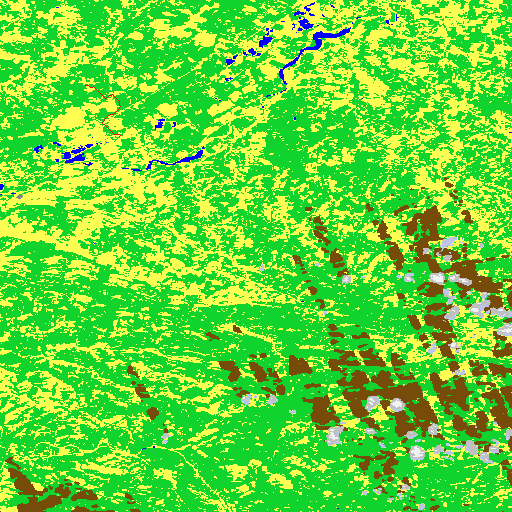

In [6]:
img_scl = wms.getmap(layers=['SCL'],
                 srs=_projection_,
                 bbox=_bbox_,
                 size=(_width_, _height_),
                 format='image/png',
                 time=_time_,
                 showlogo=False,
                 transparent=False)

img_scl_raw = wms.getmap(layers=['SCL_GRAYSCALE'],
                     srs=_projection_,
                     bbox=_bbox_,
                     size=(_width_, _height_),
                     format='image/tiff',
                     time=_time_,
                     showlogo=False,
                     transparent=False)

scl_raw_array = np.asarray(Image.open(img_scl_raw))
scl_array = np.asarray(Image.open(img_scl))

start = (1.05, 43.05)
end = (1.07, 43.08)
bbox = bbox
path = create_path_map(start, end, scl_array, bbox, 512)

writable_array = scl_array.copy()
unique = set()
for (x, y) in path:
    unique.add(tuple(writable_array[y, x][:].tolist()))
    writable_array[y, x][:] = [255, 0, 0]
print(path)
display(Image.fromarray(writable_array))
